# **Insper - Eletromagnetismo e Ondulatória** #


**Laboratório 2 - Indutância e Transformador**



In [75]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

a) Declare as variáveis do transformador: $R_1$, $R_2$, $L_1$, $L_2$ e frequência

In [76]:
R1=288e-3
R2=280e-3
L1=235e-6
L2=231e-6
C1 = 4.7e-6
C2 = 4.7e-6
Ufonte = 10
w_ress = 1/sqrt(L1*C1)
f_ress = w_ress/(2*pi)
print(abs(f_ress))

4788.916575303756


# Função do transformador
Função para calculo das correntes no circuito primário e secundário, essa função foi emprestada do transformador,<br>
visto que a forma de operação do circuito WPT é similar a de um transformador

In [77]:
def CalcularTransformador(Rc, f, k, C1, C2):
    w=2*pi*f  
    Uf=rect((2/pi)*Ufonte, 0)
    XC1=1/(1j*w*C1)
    XC2=1/(1j*w*C2)
    XL1=1j*w*L1
    XL2=1j*w*L2
    XM=k*sqrt(XL1*XL2)
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, ((Rc*XC2)/(Rc+XC2))+XL2+R2]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

## Resistor Rc (&#937;)

In [78]:
Rcarga = 10

# CORRENTES EM FUNÇÃO DA FREQUÊNCIA

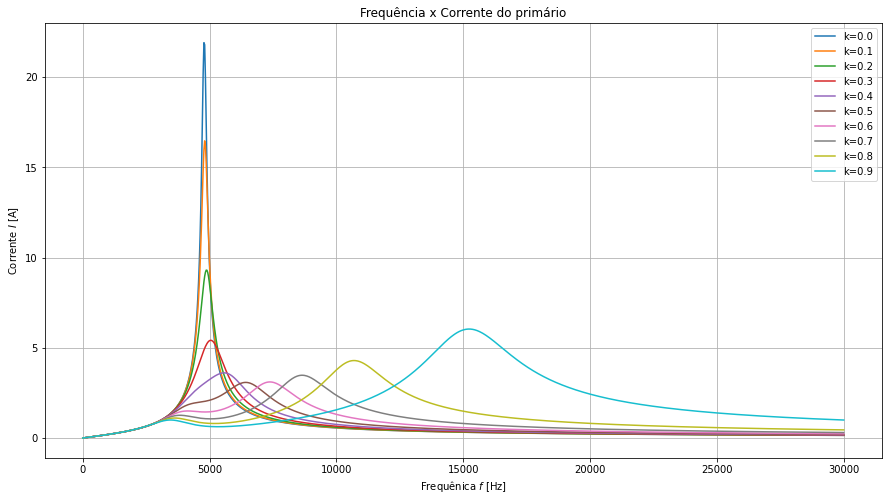

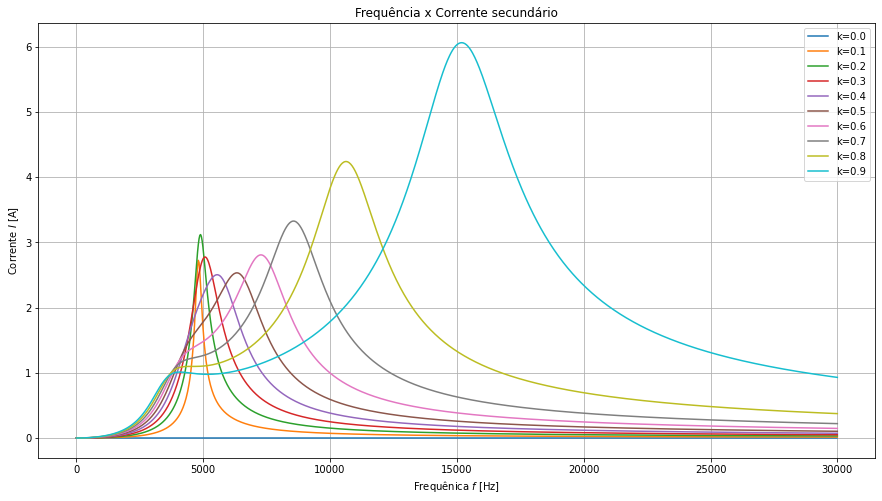

In [79]:
f=np.linspace(1,30e3,1000)
I1_ims = []
I2_ims = []
I1s = []
I2s = []
ks = np.arange(0,1,0.1)
ks_legend = []
for k in ks:
    ks_legend.append("k={0:.1f}".format(k))
    I1=[]
    I2=[]

    I1_im=[]
    I2_im=[]
    for i in f:
        i1, i2 = CalcularTransformador(Rcarga, i, k, C1, C2)
        I1.append(abs(i1))
        I2.append(abs(i2))
        I1_im.append(i1)
        I2_im.append(i2)

    I1_ims.append(I1_im)
    I2_ims.append(I2_im)
    I1s.append(I1)
    I2s.append(I2)
#Gráfico 1: Frequência x Corrente do primário
plt.figure(figsize=(15,8))
for I1 in I1s:
    plt.plot(f,I1)
plt.title("Frequência x Corrente do primário")
plt.xlabel("Frequênica $f$ [Hz]")
plt.ylabel("Corrente $I$ [A]")
plt.grid(True)
plt.legend(ks_legend)
plt.savefig("FrequênciaxCorrentePrimario")
plt.show()
#Gráfico 2: Frequência x Corrente secundário
plt.figure(figsize=(15,8))
for I2 in I2s:
    plt.plot(f,I2)
plt.title("Frequência x Corrente secundário")
plt.xlabel("Frequênica $f$ [Hz]")
plt.ylabel("Corrente $I$ [A]")
plt.grid(True)
plt.legend(ks_legend)
plt.savefig("FrequênciaxCorrenteSecundario")
plt.show()


In [80]:
max_y = max(I1)  # Find the maximum y value
max_x = f[I1.index(max_y)] 
print('Frequência de pico i1:',max_x)
print('Corrente de pico i1:',max_y)

Frequência de pico i1: 15225.717717717718
Corrente de pico i1: 6.038458923959136


In [81]:
max_y2 = max(I2)  # Find the maximum y value
max_x2 = f[I2.index(max_y2)] 
print('Frêquencia de pico i2:',max_x2)
print('Corrente de pico i2:',max_y2)

Frêquencia de pico i2: 15195.68868868869
Corrente de pico i2: 6.059855680367863


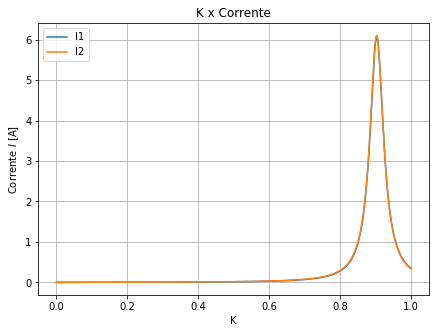

In [82]:
k=np.linspace(0,1,1000)
I1K=[]
I2K=[]

for i in k:
    i1, i2 = CalcularTransformador(Rcarga, max_x, i, C1, C2)
    I1K.append(abs(i1.real))
    I2K.append(abs(i2.real))

plt.figure(figsize=(7,5))
plt.plot(k,I1K)
plt.plot(k,I2K)

plt.title("K x Corrente")
plt.xlabel("K")
plt.ylabel("Corrente $I$ [A]")
plt.grid(True)
plt.legend(['I1', 'I2'])
plt.show()

# POTÊNCIA
Calcula da potência em diferentes frequências e com diferentes valores de k

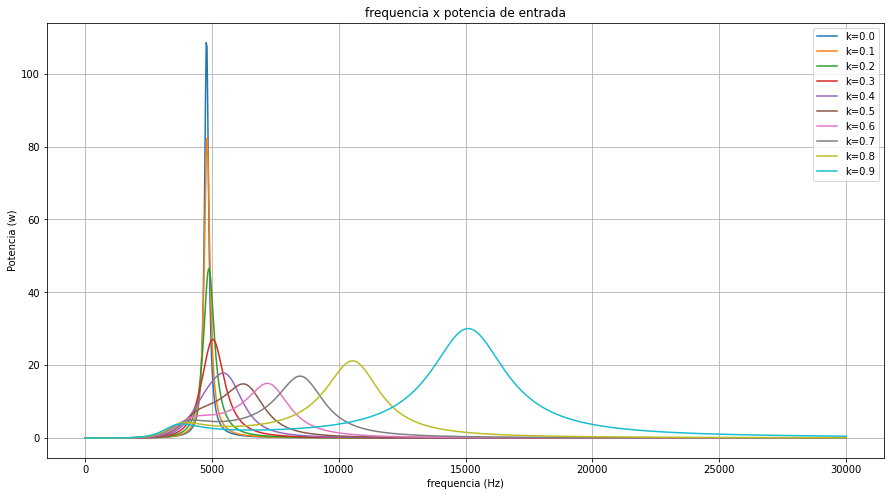

In [83]:
tensao_ef = Ufonte/sqrt(2)

plt.figure(figsize=(15,8))
pot_entradas = []
for I1_im in I1_ims:
    pot_entrada = []
    for corrente in I1_im:
        S_entrada = tensao_ef*(corrente.conjugate()/sqrt(2))
        pot_entrada.append(abs(S_entrada.real))
    plt.plot(f, pot_entrada)
    pot_entradas.append(pot_entrada)
    
plt.title("frequencia x potencia de entrada")
plt.xlabel("frequencia (Hz)")
plt.ylabel("Potencia (w)")
plt.legend(ks_legend)
plt.grid(True)
plt.savefig("frequenciaxpotencia de entrada")
plt.show()

## Gráfico da  Frequência x Potência de saída

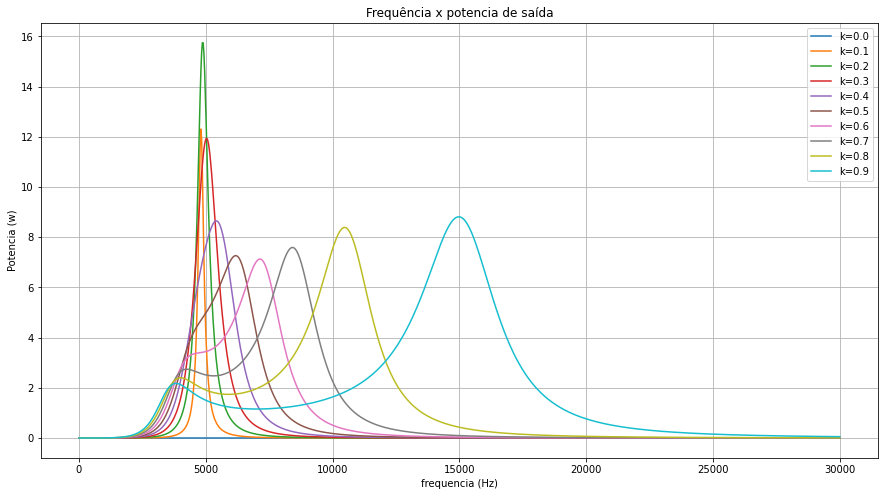

In [84]:
plt.figure(figsize=(15,8))
pot_saidas = []
V2s = []
for I2_im in I2_ims:
    i = 0
    pot_saida = []
    for corrente in I2_im:
        freq = f[i]
        w=2*pi*freq
        XC2=1/(1j*w*C2)
        Z = Rcarga*XC2/(Rcarga+XC2)
        U = (Z*corrente)/sqrt(2)
        S = U*(corrente.conjugate()/sqrt(2))
        pot_saida.append(abs(S.real))
        i += 1
    plt.plot(f, pot_saida)
    pot_saidas.append(pot_saida)
plt.title("Frequência x potencia de saída")
plt.xlabel("frequencia (Hz)")
plt.ylabel("Potencia (w)")
plt.legend(ks_legend)
plt.grid(True)
plt.savefig("frequenciaxpotencia de saida")
plt.show()

## Gráfico da Eficiência x Frequência
para diferentes valores de k

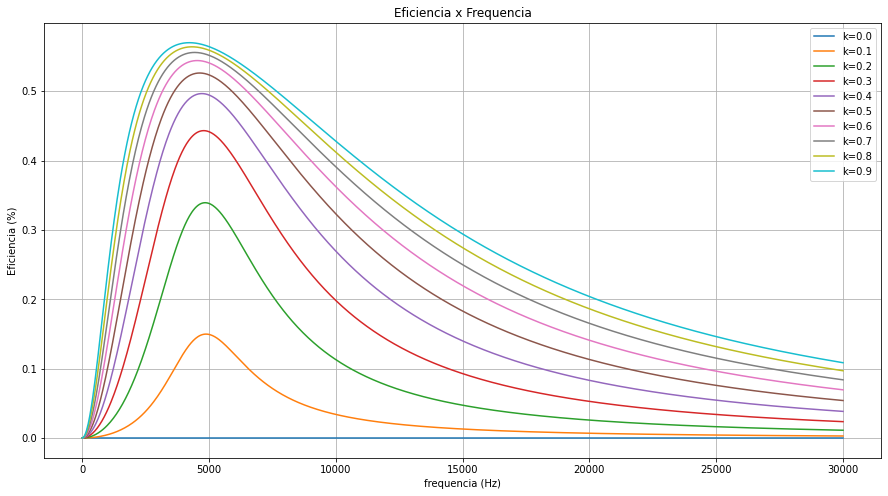

In [85]:
plt.figure(figsize=(15,8))
for j in range(0,len(pot_saidas)):
    Ef = []
    pot_entrada = pot_entradas[j]
    pot_saida = pot_saidas[j]
    for i in range(0,len(pot_saida)):
        ef = pot_saida[i]/pot_entrada[i]
        Ef.append(abs(ef))
    plt.plot(f,Ef)

plt.title("Eficiencia x Frequencia")
plt.xlabel("frequencia (Hz)")
plt.ylabel("Eficiencia (%)")
plt.legend(ks_legend)
plt.grid(True)
plt.savefig("EficienciaxFrequencia")
plt.show()

# Gráfico da Tensão em função do k
Esse gráfico pode axiliar na validação ao cruzar informações obtidas experimentalmente, em relção tensão transmitida e a distância, com os mostrados pelo gráfico

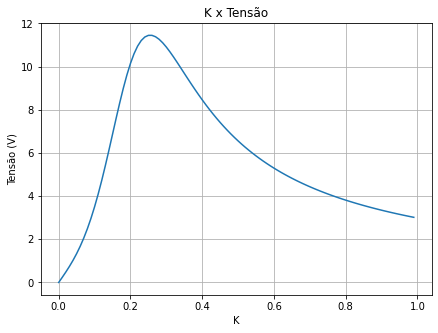

In [86]:
Us = []
ks = np.arange(0,1,0.01)
for k in ks:
    i1, i2 = CalcularTransformador(Rcarga, 5000, k, C1, C2)
    w=2*pi*5000
    XC2=1/(1j*w*C2)
    Z = Rcarga*XC2/(Rcarga+XC2)
    U = (Z*i2)/sqrt(2)
    S = U*(i2.conjugate()/sqrt(2))
    Us.append(abs(U.real))
plt.figure(figsize=(7,5))
plt.plot(ks, Us)
plt.title("K x Tensão")
plt.xlabel("K")
plt.ylabel("Tensão (V)")
plt.grid(True)
plt.show()